In [1]:
from stepmix.stepmix import StepMix
import pandas as pd
import numpy as np
# import ParameterGrid
from sklearn.model_selection import ParameterGrid

import matplotlib.pyplot as plt
import seaborn as sns

import pickle as pkl


In [2]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]
sympdf.shape

(6031, 162)

In [5]:
groups_df = pd.read_csv('output/symptom_groups.csv')


In [6]:
groups_df

,symptom,group
0,Symptom_Memory_short,Memory
1,Symptom_Memory_long,Memory
2,Symptom_Memory_no_new_memories,Memory
3,Symptom_Memory_forget_tasks,Memory
4,Symptom_Memory_other,Memory
...,...,...
156,Symptom_Neuralgia,Misc
157,Symptom_Pain_burning_chest,Misc
158,Symptom_Eye_Vision_pink_eye,Misc
159,Symptom_Eye_Vision_bloodshot_eyes,Misc


In [8]:
clus = pd.read_csv("output/cluster_stepmix_aggregate_010524.csv", index_col=0)

In [10]:
sympdf['cluster'] = clus

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_16453/4197125953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sympdf['cluster'] = clus


In [11]:
sympdf['cluster']

3         3
5        10
6         4
8         8
9         6
         ..
14158    11
14161     9
14163    10
14166     3
14168     9
Name: cluster, Length: 6031, dtype: int64

In [12]:
avg_scores_by_grouping = {}

for grouping in groups_df.group.unique():
    # calculat the average score for each symptom in the group for each cluster in 'cluster'
    keepcols = groups_df.loc[groups_df.group == grouping, 'symptom'].tolist()
    #print(keepcols)
    keepcols.append('cluster')
    a = sympdf.loc[:, keepcols]
    avg = a.groupby('cluster').mean()
    avg_scores_by_grouping[grouping] = avg.mean(axis=1)
    #avg = sympdf.loc[:, sympdf.columns.str.startswith(grouping)].groupby(clus).mean()



In [13]:
avgdf  = pd.DataFrame(avg_scores_by_grouping)


<Axes: xlabel='cluster'>

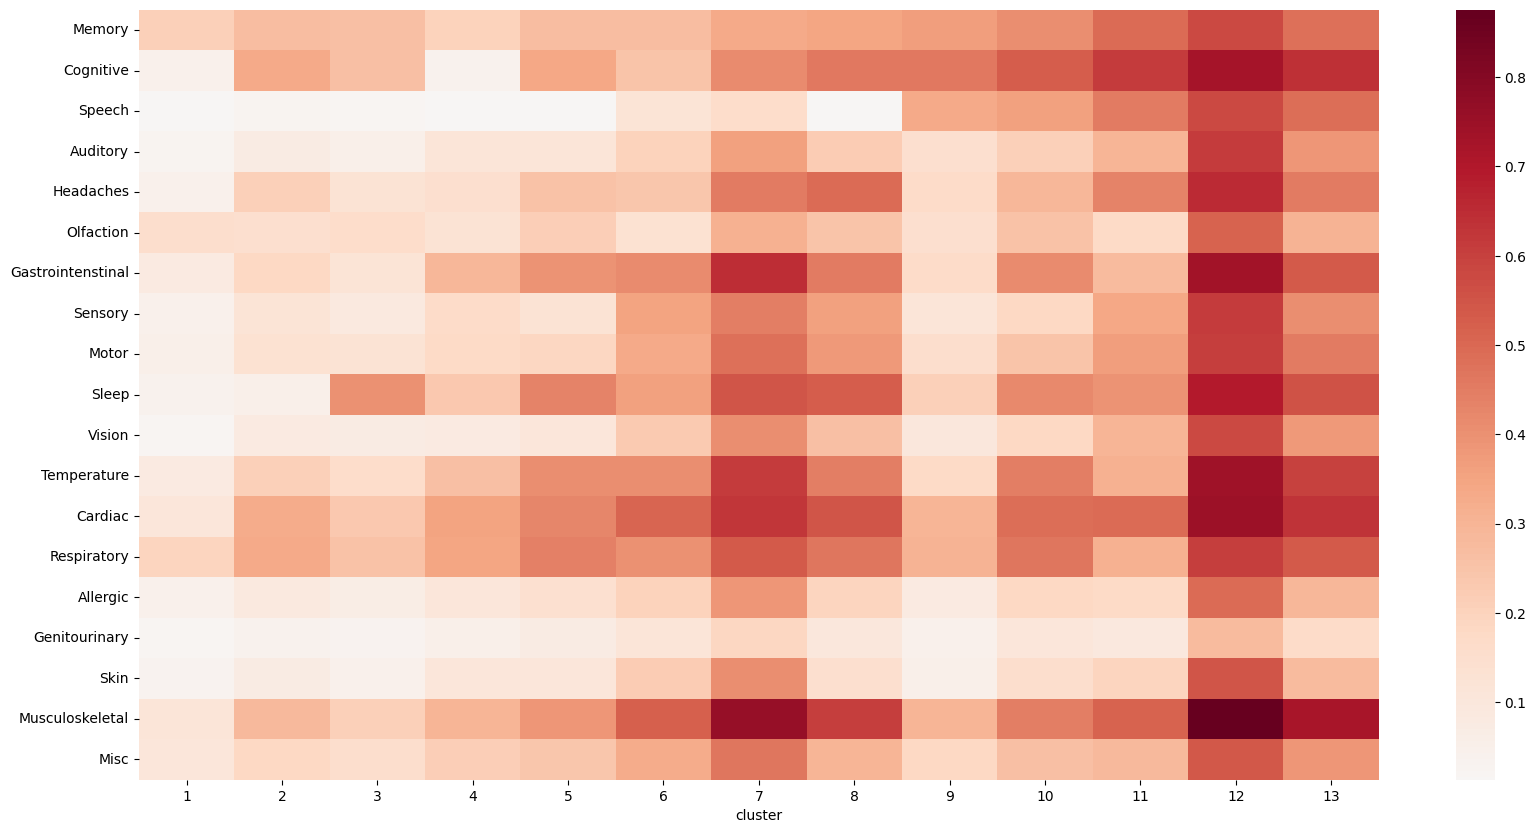

In [14]:
# plot avgdf as heatmap
plt.figure(figsize=(20,10))
sns.heatmap(avgdf.transpose(), cmap='RdBu_r', center=0)

In [21]:
# average symptom score for patients in each cluster

sympdf.groupby('cluster').mean().T.to_csv("output/stepmix_aggregate_010524_symptom_avgs.csv")

In [22]:
pd.DataFrame(avg_scores_by_grouping).T.to_csv("output/stepmix_aggregate_010524_grouped_symptom_avgs.csv")

In [ ]:
# only really meaningful thing is that cluster 5 is almost all cluster 4 in the bigger one 
# which seems not super useful...

full
8    1012
0     808
5     765
3     722
6     711
2     651
4     504
1     483
7     375
Name: count, dtype: int64

In [25]:
clusavgs = sympdf.groupby('cluster').mean()

In [28]:
clusavgs= clusavgs.T 


In [42]:
clusavgs.sub(clusavgs.mean(axis=1),axis=0 ).to_csv("output/stepmix_aggregate_010524_unusual_symptoms.csv")

In [40]:
clusavgs.iloc[0,].mean()

0.9268040215128701

In [41]:
clusavgs.iloc[0,]

cluster
1     0.945055
2     0.872527
3     0.877155
4     0.974122
5     0.911232
6     0.891403
7     0.939297
8     0.935860
9     0.900442
10    0.925620
11    0.933333
12    0.983713
13    0.958692
Name: Symptom_Memory_short, dtype: float64